In [1]:
from lale.grammar import Grammar, explore
from lale.helpers import to_graphviz, wrap_imported_operators

/home/hirzel/git/hirzel/lale/lale/search/search_space_grid.py:60: UserWarning: get_search_space_grids(num_grids=5) sampling 5/10
  warnings.warn(f"get_search_space_grids(num_grids={num_grids}) sampling {math.ceil(num_grids)}/{len(all_parameters)}")


# Simple: First example

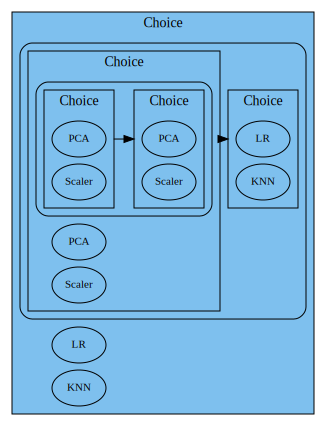

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as Scaler
wrap_imported_operators()

g = Grammar()

g.start       = g.estimator
g.estimator   = g.prim_est | g.transformer >> g.prim_est
g.transformer = g.prim_tfm | g.prim_tfm >> g.transformer

g.prim_est    = LR | KNN
g.prim_tfm    = PCA | Scaler

generated = explore(g, 4)
to_graphviz(generated)

## Training

100%|████████████| 3/3 [00:02<00:00,  1.16it/s, best loss: -0.8892363327674024]


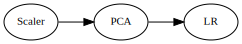

In [3]:
from lale.lib.lale import HyperoptCV
from lale.helpers import best_estimator
import lale.datasets
(train_X, train_y), (test_X, test_y) = lale.datasets.load_iris_df()

trainer = HyperoptCV(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# Grammar that exercices all combinators

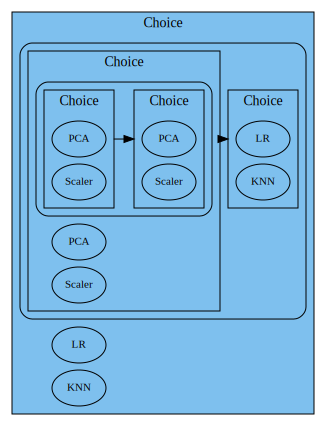

In [4]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.ensemble import AdaBoostClassifier as Boost
from lale.lib.lale import ConcatFeatures as Concat
wrap_imported_operators()

g = Grammar()

g.start       = g.estimator
g.estimator   = g.term_est | g.transformer >> g.term_est
g.term_est    = g.prim_est # | g.ensemble      # Todo add higher-order operators
# g.ensemble    = g.ensembler ( g.estimator )
g.transformer = g.union_tfm | g.union_tfm >> g.transformer
g.union_tfm   = g.prim_tfm | g.union_body >> Concat
g.union_body  = g.transformer | g.transformer & g.union_body

g.prim_est    = LR | KNN
g.prim_tfm    = PCA | Scaler
g.ensembler   = Boost

generated = explore(g, 5)
to_graphviz(generated)

100%|████████████| 3/3 [00:02<00:00,  1.14it/s, best loss: -0.8770363327674024]


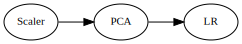

In [5]:
trainer = HyperoptCV(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# recipe: grammar from this [paper](https://link.springer.com/chapter/10.1007/978-3-319-55696-3_16)

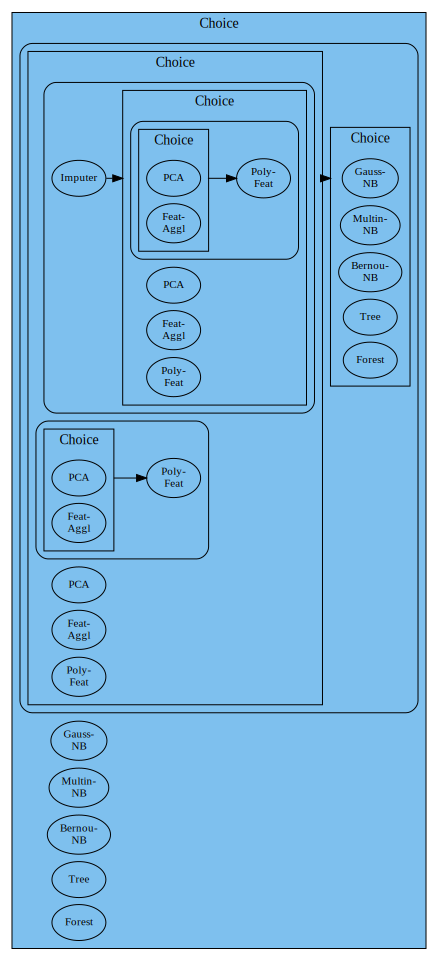

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration as FeatAggl
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.naive_bayes import GaussianNB as GaussNB
from sklearn.naive_bayes import MultinomialNB as MultinNB
from sklearn.naive_bayes import BernoulliNB as BernouNB
from sklearn.impute import SimpleImputer as Imputer
from sklearn.ensemble import RandomForestClassifier as Forest
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.feature_selection import SelectKBest
wrap_imported_operators()

g = Grammar()

g.start = g.algorithm | g.preprocessing >> g.algorithm
g.preprocessing = g.imputation >> g.dimensionality_definition | g.dimensionality_definition
g.dimensionality_definition = g.feature_selection >> g.feature_construction | g.feature_selection | g.feature_construction
g.feature_selection = g.unsupervised # | g.supervised 
g.algorithm = g.naive_bayes | g.trees

g.imputation = Imputer
# g.supervised = SelectKBest
g.unsupervised = PCA | FeatAggl
g.feature_construction = PolyFeat
g.naive_bayes = GaussNB | MultinNB | BernouNB
g.trees = Tree | Forest


generated = explore(g, 4)
to_graphviz(generated)

100%|████████████| 3/3 [00:03<00:00,  1.01it/s, best loss: -0.9139575551782683]


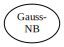

In [7]:
trainer = HyperoptCV(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# alphad3m: Grammar from this [paper](https://www.automl.org/wp-content/uploads/2019/06/automlws2019_Paper34.pdf)

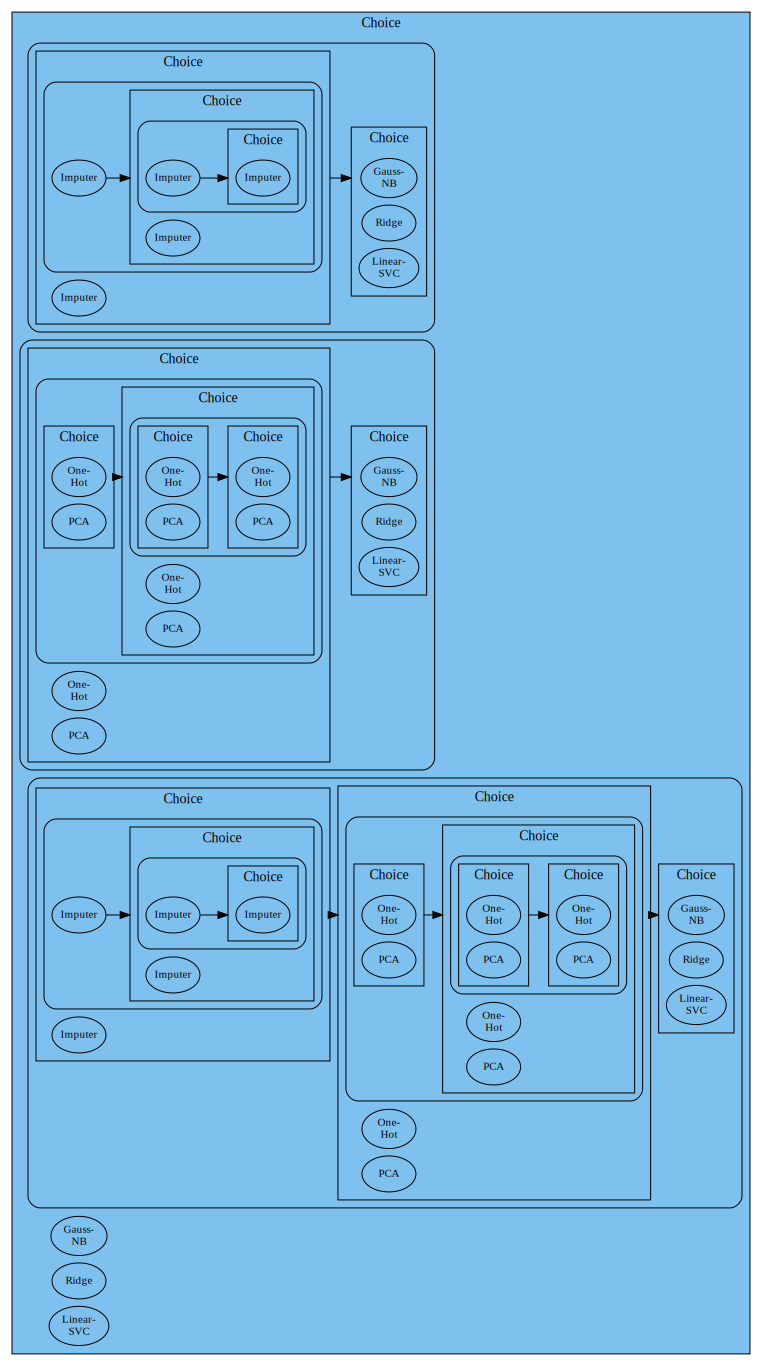

In [8]:
from sklearn.impute import SimpleImputer as Imputer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB as GaussNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder as OneHot
from sklearn.preprocessing import OrdinalEncoder
wrap_imported_operators()

g = Grammar()

g.start  = g.est | g.clean >> g.est | g.tfm >> g.est | g.clean >> g.tfm >> g.est
g.clean  = g.clean1 >> g.clean | g.clean1
g.tfm    = g.tfm1 >> g.tfm | g.tfm1

g.clean1 = Imputer #SkImputer | MissingIndicator
g.tfm1   = OneHot  | PCA # | OrdinalEncoder
g.est    = GaussNB | Ridge  | LinearSVC # | SGDClassifier

generated = explore(g, 4)
to_graphviz(generated)

  0%|                                      | 0/3 [00:00<?, ?it/s, best loss: ?]

  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 829, in _validate_input_schema
    lale.helpers.validate_schema_or_subschema(arg, sup)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 156, in validate_schema_or_subschema
    validate_subschema(sub_schema, super_schema)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 194, in validate_subschema
    raise SubschemaError(sub, sup, sub_name, sup_name)
lale.helpers.SubschemaError: Expected sub to be a subschema of super.
sub = {
    'description': 'The input data to complete.',
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'anyOf': [
            {   'type': 'number'},
            {   'type': 'string'}]}}}
super = {
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'type': 'number'}},
    'description': 'Training vector.'}

The above exception was the direct cause of the following exception:

Traceback (most recent cal

 33%|██████████                    | 1/3 [00:00<00:01,  1.10it/s, best loss: ?]

  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 829, in _validate_input_schema
    lale.helpers.validate_schema_or_subschema(arg, sup)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 156, in validate_schema_or_subschema
    validate_subschema(sub_schema, super_schema)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 194, in validate_subschema
    raise SubschemaError(sub, sup, sub_name, sup_name)
lale.helpers.SubschemaError: Expected sub to be a subschema of super.
sub = {
    'description': 'The input data to complete.',
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'anyOf': [
            {   'type': 'number'},
            {   'type': 'string'}]}}}
super = {
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'type': 'number'}},
    'description': 'Training data'}

The above exception was the direct cause of the following exception:

Traceback (most recent call l

100%|████████████| 3/3 [00:02<00:00,  1.10it/s, best loss: -0.9139575551782683]


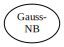

In [9]:
trainer = HyperoptCV(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))